# **Tugas Deep Learning - Nomor 2**

Nama: Pieter Christy Yan Yudhistira

NIM: 23510201111068

Kelas: DL-C

## Tugas

1. Build a convolutional network with pre-processing on the input data (jittering, normalization). Also add dropout regularization, batch normalization, and at least one additional convolutional layer
which achieves at least 90% test accuracy (for any training epoch) on MNIST dataset. Your part 1 network should train under 10 minutes, without GPUs.

2. Fine-tune AlexNet to achieve at least 80% test accuracy on the MNIST dataset. Your network should train under 10 minutes, without GPUs.


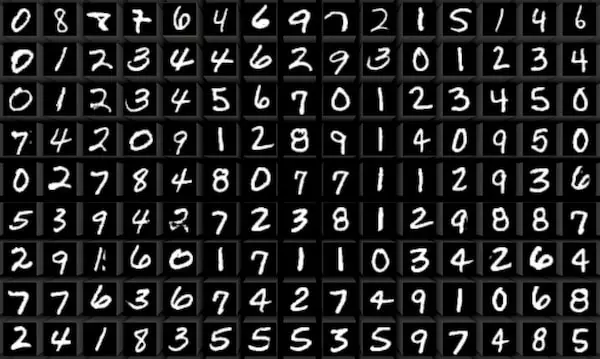

MNIST Digit merupakan kumpulan data yang terdiri dari handwritten digit atau digit yang ditulis tangan. Total data keseluruhan terdiri dari 70.000 gambar, dimana 60.000 gambar data pelatihan dan 10.000 gambar data pengujian.

In [ ]:
!wget https://github.com/phoebetronic/mnist/raw/main/mnist_train.csv.zip
!wget https://github.com/phoebetronic/mnist/raw/main/mnist_test.csv.zip
!unzip mnist_train.csv.zip
!unzip mnist_test.csv.zip


--2025-09-11 07:09:43--  https://github.com/phoebetronic/mnist/raw/main/mnist_train.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/phoebetronic/mnist/main/mnist_train.csv.zip [following]
--2025-09-11 07:09:43--  https://raw.githubusercontent.com/phoebetronic/mnist/main/mnist_train.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13270831 (13M) [application/zip]
Saving to: ‘mnist_train.csv.zip.2’

mnist_train.csv.zip 100%[===================>]  12.66M  --.-KB/s    in 0.1s    

2025-09-11 07:09:43 (115 MB/s) - ‘mnist_train.csv.zip.2’ saved [13270831/13270831]

--2025-09-11 07:09:43

Dalam tugas ini, saya bertujuan membangun Convolutional Neural Network (CNN) yang mampu mengklasifikasikan digit dari tulisan tangan tersebut dengan menerapkan intruksi yang diberikan oleh soal. Intruksinya diantara itu:

- Preprocessing berupa data augmentasi berupa jittering dan normalization
- Menambahkan Dropout Regularization
= Menambahkan Batch Normalization
- Minimal terdapat satu layer convolutional tambahan
- Mencapai akurasi data pengujian 90% (dalam tahap epoch apapun)
- Model mampu belajar dibawah 10 menit tanpa menggunakan GPUs.

# Code


## Import Libraries

In [ ]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision import transforms

# Library untuk mendapatkan ringkasan informasi tentang model (Terutama parameter)
from torchsummary import summary

import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('svg')

## Load Data

In [ ]:
# Define column names
col_names = ['label'] + [f'pixel{i}' for i in range(784)]

# Load the training and test datasets without a header, assigning column names
train = pd.read_csv("/content/mnist_train.csv", header=None, names=col_names)
test = pd.read_csv("/content/mnist_test.csv", header=None, names=col_names)

## MNIST Overview

MNIST Digit yang saya gunakan adalah versi CSV, dimana terdiri dari label dan pixel 0 - 783 untuk merepresentasikan pixel gambar.

In [ ]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bisa disimpulkan gambar dalam MNIST digit terdiri dari 60.000 data pelatihan dan 10.000 data pengujian, dengan masing-masing gambar terdiri dari 784 (-1 kolom untuk label) pixel.

In [ ]:
print(f"Train data: {train.shape}")
print(f"Test data: {test.shape}")
print(f"Labels: {test['label'].unique()}")

Train data: (60000, 785)
Test data: (10000, 785)
Labels: [7 2 1 0 4 9 5 6 3 8]


In [ ]:
train['label'].value_counts().sort_index()

,count
label,
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851


Berdasarkan persebaran data, kita dapat menyimpulkan data pelatihan seimbang (masing-masing nilai di range 5400 - 6700)

# Exploratory Data Analysis (EDA)

## Ilustrasi MNIST Digit

/tmp/ipython-input-2180870905.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

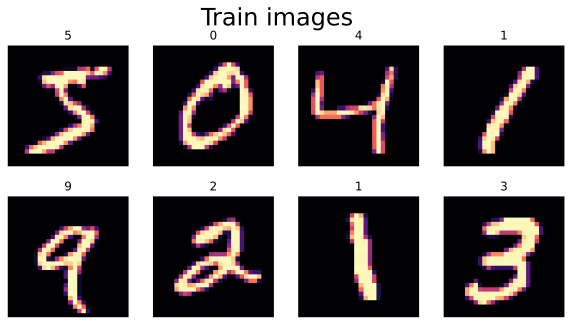

In [ ]:
# Menampilkan MNIST Digit pelatihan
fig, ax = plt.subplots(figsize=(10, 5))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')
ax.axis('off')

/tmp/ipython-input-2041173255.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

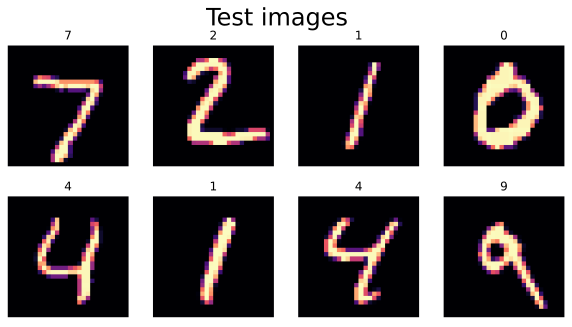

In [ ]:
# Menampilkan MNIST Digit pengujian
fig, ax = plt.subplots(figsize=(10, 5))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')
ax.axis('off')

# Load & Preprocessing Tensor Dataset

Kode ini saya gunakan untuk mengolah data MNIST yang direpresentasikan dalam .csv menjadi data tensor

In [ ]:
# Custom dataset for MNIST CSV
class MNIST_CSV_Dataset(Dataset):
    def __init__(self, data, transform=None):
        self.labels = data.iloc[:, 0].values
        self.images = data.iloc[:, 1:].values.reshape(-1, 28, 28).astype(np.uint8)
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image, label = self.images[idx], self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

## Preprocessing

Dalam preprocessing saya ingin menerapkan dua prepro, Jittering dan Normalization.

Untuk Jittering, saya menggunakan RandomAffine dikarenakan saya ingin berfokus akan transformasi gambar dibandingkan warna (yang umumnya ditemukan di ColorJitter) dan tidak bertujuan menerapkan fokus dalam skala (ScaleJitter).

Kemudian saya menggunakan transforms.Normalize((0.1307,), (0.3081,)) sebagai Normalize dimana menggunakan modifikasi mean 0.1307 dan standar deviasi dikarenakan saya menemukan bahwa data MNIST memiliki distribusi yang unik sehingga lebih cocok menggunakan normalisasi tersebut.

Referensi:
- https://github.com/pytorch/examples/issues/653

Berikut ini merupakan contoh dari `RandomAffine()` sebagai augmentasi data jitter yang berusaha mengatur skala dan posisi gambar

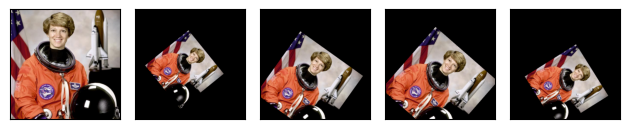

In [ ]:
# Preprocessing
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomAffine(degrees=10, translate=(0.1, 0.1)),  # Jittering
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # Normalization
])

Untuk loading data, saya menerapkan batch size 64 untuk menangani data yang cukup besar (60k gambar dalam pelatihan)

In [ ]:
train_dataset = MNIST_CSV_Dataset(train, transform=transform)
test_dataset = MNIST_CSV_Dataset(test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# CNN Model

Berikut adalah ilustrasi arsitektur model yang saya buat. Saya menggunakan NN SVG untuk mengilustrasikan model saya

https://alexlenail.me/NN-SVG/LeNet.html

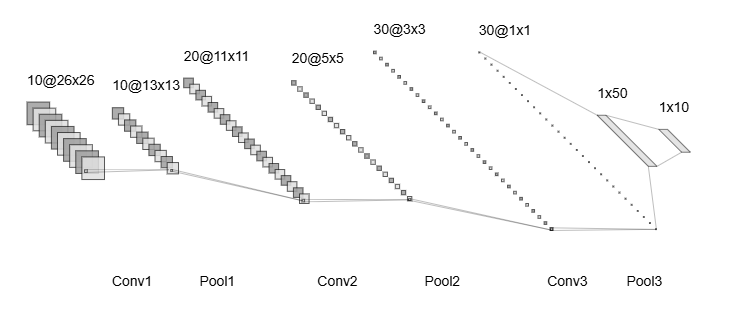

In [ ]:
class CNN(nn.Module):
  def __init__(self, printtoggle=False):
      super().__init__()

      # Convolution layers + Batch Normalization
      self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1, padding=1)
      self.bn1 = nn.BatchNorm2d(10)

      self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1, padding=1)
      self.bn2 = nn.BatchNorm2d(20)

      self.conv3 = nn.Conv2d(20, 30, kernel_size=5, stride=1, padding=1)
      self.bn3 = nn.BatchNorm2d(30)

      # Pooling (Max Pooling)
      self.pool = nn.MaxPool2d(2, 2)

      # Dropout Normalization
      self.dropout = nn.Dropout(0.5)

      # Dynamically compute fully connected size
      with torch.no_grad():
          dummy = torch.zeros(1, 1, 28, 28)
          dummy = self.pool(F.relu(self.bn1(self.conv1(dummy))))
          dummy = self.pool(F.relu(self.bn2(self.conv2(dummy))))
          dummy = self.pool(F.relu(self.bn3(self.conv3(dummy))))
          self.nUnits = dummy.numel()

      # Fully connected layer
      self.fc1 = nn.Linear(self.nUnits, 50)

      # Output layer
      self.fc2 = nn.Linear(50, 10)

      # Print toggle
      self.print = printtoggle

  def forward(self, x):
      if self.print: print("Input:", x.shape)

      x = self.pool(F.relu(self.bn1(self.conv1(x))))
      if self.print: print("After conv1/pool:", x.shape)

      x = self.pool(F.relu(self.bn2(self.conv2(x))))
      if self.print: print("After conv2/pool:", x.shape)

      x = self.pool(F.relu(self.bn3(self.conv3(x))))
      if self.print: print("After conv3/pool:", x.shape)

      x = x.view(x.size(0), -1)
      if self.print: print("Flatten:", x.shape)

      x = self.dropout(F.relu(self.fc1(x)))
      if self.print: print("FC1:", x.shape)

      x = self.fc2(x)
      if self.print: print("Output:", x.shape)

      return x

In [ ]:
model = CNN(printtoggle=False)

Dibawah ini merupakan summary dari model CNN yang saya kembangkan untuk menangani klasifikasi MNIST

In [ ]:
summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 26, 26]             260
       BatchNorm2d-2           [-1, 10, 26, 26]              20
         MaxPool2d-3           [-1, 10, 13, 13]               0
            Conv2d-4           [-1, 20, 11, 11]           5,020
       BatchNorm2d-5           [-1, 20, 11, 11]              40
         MaxPool2d-6             [-1, 20, 5, 5]               0
            Conv2d-7             [-1, 30, 3, 3]          15,030
       BatchNorm2d-8             [-1, 30, 3, 3]              60
         MaxPool2d-9             [-1, 30, 1, 1]               0
           Linear-10                   [-1, 50]           1,550
          Dropout-11                   [-1, 50]               0
           Linear-12                   [-1, 10]             510
Total params: 22,490
Trainable params: 22,490
Non-trainable params: 0
---------------------------------

# Pelatihan (Training)

Dalam pelatihan ini, saya memastikan saya menggunakan CPU dibandingkan GPU dikarenakan menyesuaikan dengan instruksi yang diberikan

Saya menggunakan Cross Entropy Loss dan Adam sebagai loss function dan optimizer standar model.

Epoch yang saya gunakan adalah 5 untuk memastikan model dapat belajar kurang dari 10 menit tanpa GPU, hal ini juga dikarenakan model sudah mampu konvergen dengan epoch yang sedikit.

In [ ]:
device = torch.device("cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, test_losses = [], []
trainAcc, testAcc = [], []
EPOCH = 5

In [ ]:
# Training loop
for epoch in range(EPOCH):  # should converge quickly
    model.train()
    train_loss = 0
    correct_train, total_train = 0, 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item() * labels.size(0)

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    avg_train_loss = train_loss / total_train
    train_accuracy = 100 * correct_train / total_train

    # Evaluation
    model.eval()
    test_loss = 0
    correct_test, total_test = 0, 0
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            test_loss += loss.item() * labels.size(0)

            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_test_loss = test_loss / total_test
    test_accuracy = 100 * correct_test / total_test

    # Accuracy Metric
    recall = recall_score(all_labels, all_preds, average='macro')
    precision = precision_score(all_labels, all_preds, average='macro')
    f1 = f1_score(all_labels, all_preds, average='macro')

    train_losses.append(avg_train_loss)
    test_losses.append(avg_test_loss)
    trainAcc.append(train_accuracy)
    testAcc.append(test_accuracy)

    print(f"Epoch {epoch+1}: "
          f"Train Loss={avg_train_loss:.4f}, Train Acc={train_accuracy:.2f}%, "
          f"Test Loss={avg_test_loss:.4f}, Test Acc={test_accuracy:.2f}%, "
          f"Precision={precision:.2f}, Recall={recall:.2f}, F1={f1:.2f}")

Epoch 1: Train Loss=0.4330, Train Acc=87.21%, Test Loss=0.3806, Test Acc=97.47%, Precision=0.97, Recall=0.97, F1=0.97
Epoch 2: Train Loss=0.1443, Train Acc=96.09%, Test Loss=0.0400, Test Acc=97.93%, Precision=0.98, Recall=0.98, F1=0.98
Epoch 3: Train Loss=0.1162, Train Acc=96.83%, Test Loss=0.0475, Test Acc=98.39%, Precision=0.98, Recall=0.98, F1=0.98
Epoch 4: Train Loss=0.0997, Train Acc=97.30%, Test Loss=0.1606, Test Acc=98.62%, Precision=0.99, Recall=0.99, F1=0.99
Epoch 5: Train Loss=0.0922, Train Acc=97.41%, Test Loss=0.0359, Test Acc=98.52%, Precision=0.99, Recall=0.99, F1=0.99


# Evalution

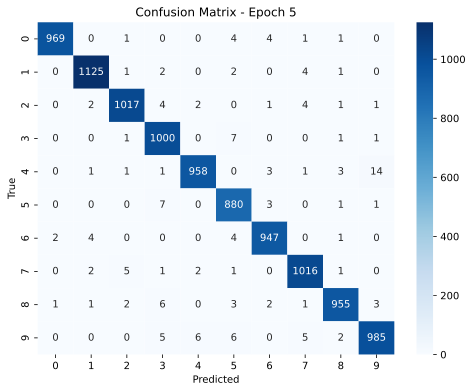

In [ ]:
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.title(f"Confusion Matrix - Epoch {epoch+1}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

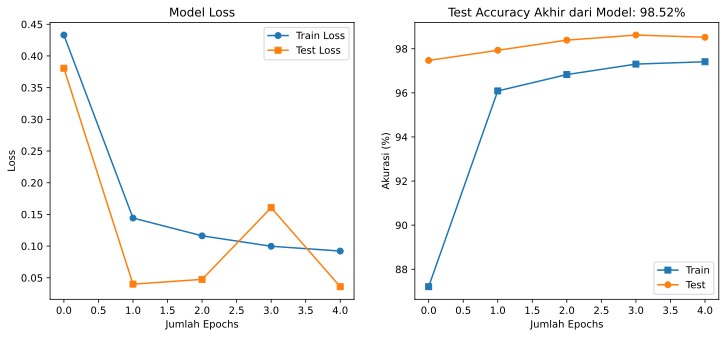

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(train_losses, 'o-', label='Train Loss')
ax[0].plot(test_losses, 's-', label='Test Loss')
ax[0].set_xlabel('Jumlah Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')
ax[0].legend()

ax[1].plot(trainAcc, 's-', label='Train')
ax[1].plot(testAcc, 'o-', label='Test')
ax[1].set_xlabel('Jumlah Epochs')
ax[1].set_ylabel('Akurasi (%)')
ax[1].set_title(f'Test Accuracy Akhir dari Model: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()